### Schemdraw Test Cases
In addition to running the documentation/gallery examples, this notebook provides some extra test cases to verify functionality.

In [1]:
# kwargs to Element are still supported. This syntax is tested here.
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic as l
from schemdraw.util import Point
print(schemdraw.__version__)
schemdraw.use('svg')

0.8


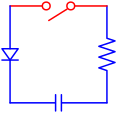

In [2]:
# Test directions. Should form square. Blue as default color.
d = schemdraw.Drawing(color='blue', lw=1.5)
d.add(elm.Capacitor('right'))
d.add(elm.Resistor('up'))
d.add(elm.Switch('l', color='red'))
d.add(elm.Diode('down'))
d.draw()

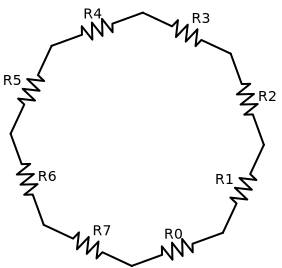

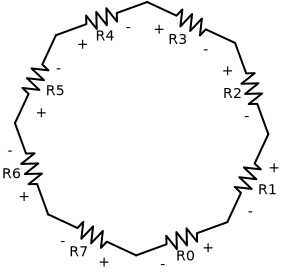

In [3]:
# Test label positioning & rotations/theta
d = schemdraw.Drawing()
for i in range(8):
    d.add(elm.Resistor(label='R%d'%i, theta=45*i+20))
display(d.draw())

d = schemdraw.Drawing()
for i in range(8):
    d.add(elm.Resistor(botlabel=['$-$','R%d'%i,'+'], theta=45*i+20))  # put the - sign in LaTeX/math mode so it's not a hyphen.
display(d.draw())


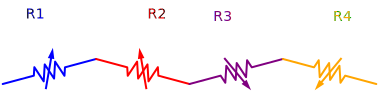

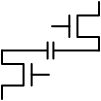

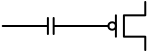

In [4]:
# Reverse and Flip, Colors
d = schemdraw.Drawing()
d.add(elm.ResistorVar(label='R1', theta=15, reverse=False, color='blue', lblofst=1))
d.add(elm.ResistorVar(label='R2', theta=-15, reverse=True, color='red', lblofst=1))
d.add(elm.ResistorVar(label='R3', theta=15, flip=True, color='purple', lblofst=1))
d.add(elm.ResistorVar(label='R4', theta=-15, flip=True, reverse=True, color='orange', lblofst=1))
display(d.draw())

# Reverse/flip 3-terminal
d = schemdraw.Drawing()
f = d.add(elm.NFet())
d.add(elm.Capacitor(xy=f.drain))
d.add(elm.NFet(reverse=True, anchor='source'))
display(d.draw())

d = schemdraw.Drawing(inches_per_unit=.5)
d.add(elm.Capacitor())
d.add(elm.PFet(anchor='gate', reverse=True))
display(d.draw())

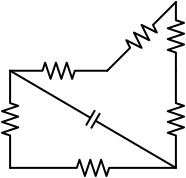

In [5]:
# to, tox, toy, endpts
# Should be closed loop with cap along diagonal.
d = schemdraw.Drawing()
R1 = d.add(elm.Resistor())
R2 = d.add(elm.Resistor(theta=45))
R3 = d.add(elm.Resistor('down', toy=R1.end))
R4 = d.add(elm.Resistor('down'))
R5 = d.add(elm.Resistor('left', tox=R1.start))
R6 = d.add(elm.Resistor(endpts=[R5.end, R1.start]))
C = d.add(elm.Capacitor(to=R4.end))
d.draw()

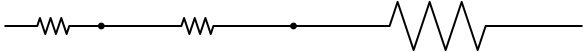

In [6]:
# length, xoom
d = schemdraw.Drawing()
d.add(elm.Resistor())
d.add(elm.Dot())
d.add(elm.Resistor(l=6))
d.add(elm.Dot())
d.add(elm.Resistor(zoom=3))
d.draw()

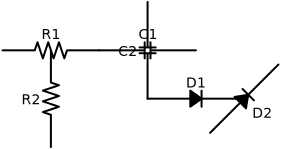

In [7]:
# Anchor Test
# R2 should start at the center of R1
# Capacitors have center at same point
# Tilted diode is centered on end of straight diode

d = schemdraw.Drawing(inches_per_unit=.5)
R1 = d.add(elm.Resistor(label='R1'))
R2 = d.add(elm.Resistor('down', xy=R1.center, label='R2'))
C1 = d.add(elm.Capacitor('right', xy=R1.end, label='C1'))
C2 = d.add(elm.Capacitor('down', xy=C1.center, anchor='center', label='C2'))
D1 = d.add(elm.Diode('right', label='D1', fill='black'))
D2 = d.add(elm.Diode(theta=45, anchor='center', xy=D1.end, botlabel='D2', fill='black'))
    
d.draw()

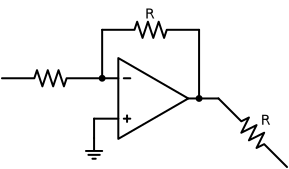

In [8]:
# Opamp, opamp anchor points
d = schemdraw.Drawing(inches_per_unit=.5)
op = d.add(elm.Opamp())
d.add(elm.Line('left', xy=op.in1, l=d.unit/6))
d.add(elm.Dot())
d.add(elm.Line(d='up', l=d.unit/2))
Rf = d.add(elm.Resistor('right', l=d.unit*1, label='$R_f$'))

ee = d.add(elm.Line(d='down', toy=op.out))
ll = d.add(elm.Line(d='left', tox=op.out))
d.add(elm.Dot(xy=ll.start))
out = d.add(elm.Line(d='right', l=d.unit/5))

Rf = d.add(elm.Resistor(theta=-45, label='$R_o$'))
Rin = d.add(elm.Resistor(d='left', xy=Point(op.in1)-Point((d.unit/5,0))))
d.add(elm.Line(d='left', xy=op.in2, l=d.unit/4))
d.add(elm.Line(d='down', l=d.unit/5))
d.add(elm.Ground())
d.draw()

In [9]:
# Drawing unit effects default length of Element2Terms.
d = schemdraw.Drawing(unit=2)
d.add(elm.Resistor())
d.add(elm.Capacitor())
display(d.draw())

d = schemdraw.Drawing(unit=4)
d.add(elm.Resistor())
d.add(elm.Capacitor())
display(d.draw())

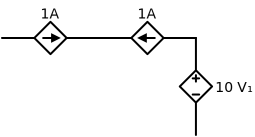

In [10]:
# Dependent sources
d = schemdraw.Drawing()
d.add(elm.SourceControlledV(botlabel='10 $V_1$'))
d.add(elm.SourceControlledI('left', toplabel='1A'))
d.add(elm.SourceControlledI('left', reverse=True, toplabel='1A'))
d.draw()


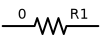

In [11]:
# Label location, adding labels after adding element

d = schemdraw.Drawing()
R = d.add(elm.Resistor(label='R1', lblloc='center', lblofst=[.9,.4]))
R.add_label('0', loc='center', ofst=[-.9,.4])
d.draw()

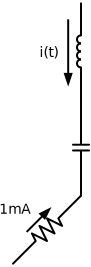

In [12]:
# Test current label arrows, reversing, length
# The 1mA current arrow should be same length as resistor, pointing up/right
# The i(t) arrow should point down (reverse of inductor 'up' direction)
d = schemdraw.Drawing()
R = d.add(elm.Resistor(theta=45))
d.add(elm.CurrentLabel(label='1mA', xy=R.center, length=1))
d.add(elm.Capacitor('up'))
L = d.add(elm.Inductor())
d.add(elm.CurrentLabel(label='$i(t)$', xy=L.center, reverse=True))
d.draw()


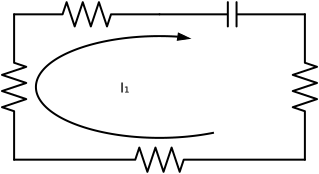

In [13]:
# Test loop current label
d = schemdraw.Drawing(inches_per_unit=.75)
R1 = d.add(elm.Resistor())
C = d.add(elm.Capacitor())
R2 = d.add(elm.Resistor('down'))
R3 = d.add(elm.Resistor('left', tox=R1.start))
R4 = d.add(elm.Resistor('up'))
d.loopI([R1, R2, R3, R4], d='cw', label='$I_1$', theta1=70, theta2=-40)
d.draw()


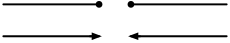

In [14]:
# Check reverse of Arrow and LineDot that have points referenced to start/end
schemdraw.Drawing(
    elm.Arrow(),
    elm.Arrow(at=[4, 0], reverse=True),
    elm.LineDot(at=[0, 1]),
    elm.LineDot(at=[4, 1], reverse=True)
)

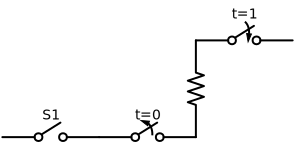

In [15]:
# Switches
d = schemdraw.Drawing()
d.add(elm.Switch(label='S1'))
d.add(elm.Switch(action='open', label='$t=0$'))
d.add(elm.Resistor(d='up'))
d.add(elm.Switch(action='close', label='$t=1$', d='right'))
d.draw()

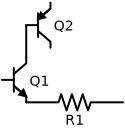

In [16]:
# BJT's
d = schemdraw.Drawing()
Q1 = d.add(elm.BjtNpn(rgtlabel='Q1', circle=True))
d.add(elm.Line(d='up', l=1))
Q2 = d.add(elm.BjtPnp(d='right', rgtlabel='Q2', circle=True))
d.add(elm.Resistor(xy=Q1.emitter, botlabel='R1'))
d.draw()


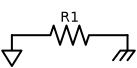

In [17]:
# Test grounds
d = schemdraw.Drawing(inches_per_unit=.6)
d.add(elm.GroundSignal())
d.add(elm.Resistor(label='R1'))
d.add(elm.GroundChassis())
d.draw()

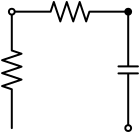

In [18]:
# Open and closed dots
d = schemdraw.Drawing(inches_per_unit=.6)
d.add(elm.Resistor(d='up'))
d.add(elm.Dot(open=True))
d.add(elm.Resistor(d='right'))
d.add(elm.Dot())
d.add(elm.Capacitor(d='down'))
d.add(elm.Dot(open=True))
d.draw()

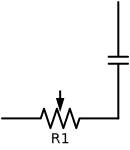

In [19]:
# pot
d = schemdraw.Drawing(inches_per_unit=.6)
d.add(elm.Potentiometer(label='R1'))
d.add(elm.Capacitor(d='up'))
d.draw()

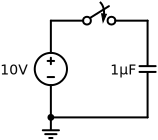

In [20]:
# Looks like a homework problem
d = schemdraw.Drawing()
G = d.add(elm.Ground())
d.add(elm.SourceV(d='up', toplabel='10V', lblofst=.2))
S1 = d.add(elm.Switch(action='close', d='right'))
d.add(elm.Capacitor(d='down', label='1$\mu$F'))
d.add(elm.Line(d='left', tox=G.xy))
d.add(elm.Dot())
d.draw()


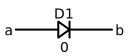

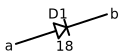

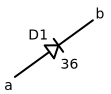

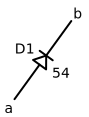

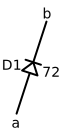

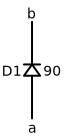

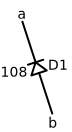

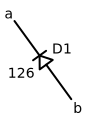

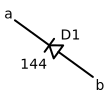

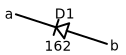

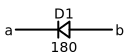

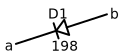

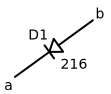

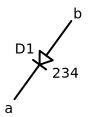

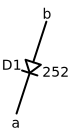

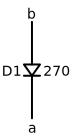

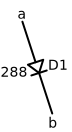

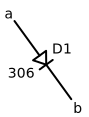

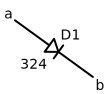

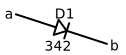

In [21]:
# Label offsets/rotations
div = 20
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(elm.Diode, theta=th, label='D1')
    R1.add_label('%.0f'%th, loc='bot')
    R1.add_label('a', loc='lft')
    R1.add_label('b', loc='rgt')
    display(d.draw())
    

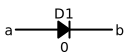

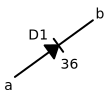

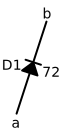

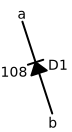

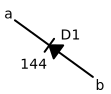

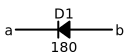

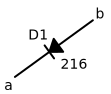

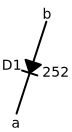

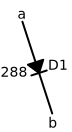

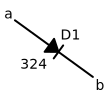

In [22]:
# Label offsets/rotations - with flip
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(elm.Diode(fill='black', theta=th, flip=True))
    R1.add_label('D1', loc='top')
    R1.add_label('%.0f'%th, loc='bot')
    R1.add_label('a', loc='lft')
    R1.add_label('b', loc='rgt')
    display(d.draw())
    

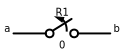

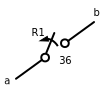

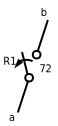

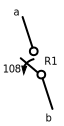

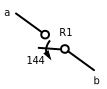

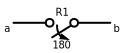

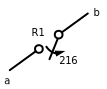

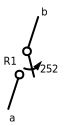

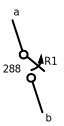

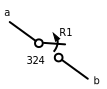

In [23]:
# Label offsets/rotations - with reverse
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing(fontsize=10)
    R1 = d.add(elm.Switch(action='open', theta=th, reverse=False))
    R1.add_label('R1', loc='top')
    R1.add_label(format(th, '.0f'), loc='bot')
    R1.add_label('a', loc='lft')
    R1.add_label('b', loc='rgt')
    display(d.draw())
    

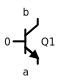

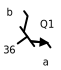

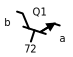

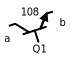

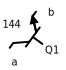

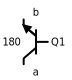

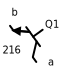

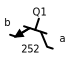

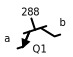

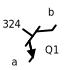

In [24]:
# Label offsets/rotations - BJT
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing(fontsize=10)
    R1 = d.add(elm.BjtNpn, theta=th)
    R1.add_label('Q1', loc='rgt')
    R1.add_label(format(th, '.0f'), loc='lft')
    R1.add_label('a', loc='bot')
    R1.add_label('b', loc='top')
    display(d.draw())
    

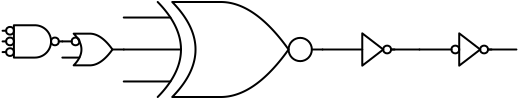

In [25]:
# Logic gates, zoom
d = schemdraw.Drawing()
d.add(l.Nand(inputs=3, inputnots=[1,2,3]))
d.add(l.Or(inputnots=[1], anchor='in1'))
d.add(l.Xor(inputs=3, nor=True, zoom=3))
d.add(l.Not)
d.add(l.NotNot)
d.draw()

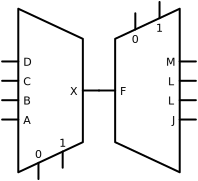

In [26]:
# Multiplexer/demultiplexer
d = schemdraw.Drawing()
M1 = d.add(elm.Multiplexer(pins=[elm.IcPin(name='A', side='L'),
                               elm.IcPin(name='B', side='L'),
                               elm.IcPin(name='C', side='L'), 
                               elm.IcPin(name='D', side='L'),
                               elm.IcPin(name='X', side='R'), 
                               elm.IcPin(name='0', side='B'),
                               elm.IcPin(name='1', side='B')]))
M2 = d.add(elm.Multiplexer(pins=[elm.IcPin(name='F', side='L'),
                               elm.IcPin(name='J', side='R'),
                               elm.IcPin(name='L', side='R'),
                               elm.IcPin(name='L', side='R'),
                               elm.IcPin(name='M', side='R'),
                               elm.IcPin(name='0', side='T'),
                               elm.IcPin(name='1', side='T')],
                         demux=True, xy=M1.X, anchor='F'))
                 
d.draw()

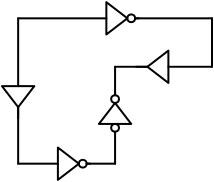

In [27]:
# Test lead extension of single input/output logic gates
d = schemdraw.Drawing()
n = d.add(l.Not)
d.add(l.NotNot('up'))
d.add(l.Buf('right', reverse=True))
d.add(l.Line('up', l=d.unit/2))
d.add(l.Not('left', tox=n.start, reverse=True))
d.add(l.Buf('down', toy=n.start))
d.draw()

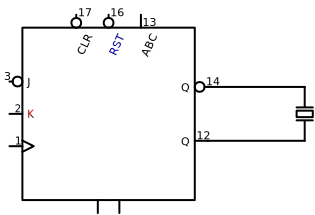

In [28]:
# Test various aspects of ic() function
# including labels, pin labels, colors, fontsizes, invertbubbles, and anchors
ic = elm.Ic(pins=[
      elm.IcPin(name='>', pin='1', side='left'),
      elm.IcPin(name='K', pin='2', side='left', lblsize=10, color='red'),
      elm.IcPin(name='J', pin='3', side='left', invert=True),
      elm.IcPin(name='Q', pin='12', side='right'),
      elm.IcPin(name='$\overline{Q}$', pin='14', side='right', invert=True, anchorname='QBAR'),
      elm.IcPin(name='RST', pin='16', side='top', slot='2/3', rotation=65, invert=True, color='blue'),
      elm.IcPin(name='CLR', pin='17', side='top', slot='1/3', rotation=65, invert=True),
      elm.IcPin(name='ABC', pin='13', side='top', slot='3/3', rotation=65, invert=False),
      elm.IcPin(side='bot', pos=.6),
      elm.IcPin(side='bot', pos=.4)],
      edgepadH = 1,
      edgepadW = 1,
      leadlen=.4,
      slant=0,
      pinspacing=1
      )

d = schemdraw.Drawing()
I = d.add(ic)
d.add(elm.Line('right', xy=I.QBAR))
d.add(elm.Crystal('down', toy=I.Q))
d.add(elm.Line('left', tox=I.Q))
d.draw()

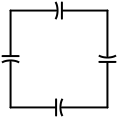

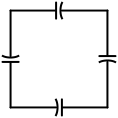

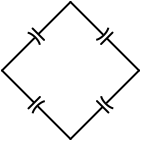

In [29]:
# Check arc drawing that broke with matplotlib 2.2
d = schemdraw.Drawing()
d.add(elm.Capacitor2)
d.add(elm.Capacitor2, d='up')
d.add(elm.Capacitor2, d='left')
d.add(elm.Capacitor2, d='down')
display(d.draw())

d = schemdraw.Drawing()
d.add(elm.Capacitor2, reverse=True)
d.add(elm.Capacitor2, d='up', reverse=True)
d.add(elm.Capacitor2, d='left', reverse=True)
d.add(elm.Capacitor2, d='down', reverse=True)
display(d.draw())

d = schemdraw.Drawing()
d.add(elm.Capacitor2, theta=45)
d.add(elm.Capacitor2, theta=135)
d.add(elm.Capacitor2, theta=225)
d.add(elm.Capacitor2, theta=-45)
display(d.draw())

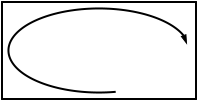

In [30]:
# Make sure arrow head is in correct place
d = schemdraw.Drawing()
L1 = d.add(elm.Line, l=d.unit*2)
L2 = d.add(elm.Line, d='down')
L3 = d.add(elm.Line, d='left', tox=L1.start)
L4 = d.add(elm.Line, d='up' )
d.loopI([L1, L2, L3, L4], d='cw', theta1=10, theta2=292 )
d.draw()

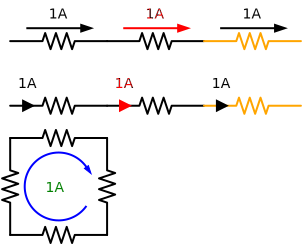

In [31]:
d = schemdraw.Drawing()
R = d.add(elm.Resistor())
d.labelI(R, '1A')  # Default
R = d.add(elm.Resistor())
d.labelI(R, '1A', color='red')  # Independent color
R = d.add(elm.Resistor(color='orange'))
d.labelI(R, '1A')  # Inherit color from element

R = d.add(elm.Resistor(at=(0,-2)))
d.labelI_inline(R, '1A')  # Default
R = d.add(elm.Resistor())
d.labelI_inline(R, '1A', color='red')  # Independent color
R = d.add(elm.Resistor(color='orange'))
d.labelI_inline(R, '1A')  # Inherit color from element

R1 = d.add(elm.Resistor(at=(0, -3)))
R2 = d.add(elm.Resistor('down'))
R3 = d.add(elm.Resistor('left'))
R4 = d.add(elm.Resistor('up'))
LL = d.loopI((R1, R2, R3, R4), '1A', color='blue')
LL.segments[1].color='green'   # Can still change color of individual segments
d.draw()

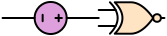

In [32]:
# Fill on paths (like the gate) and shapes (like the source)
d = schemdraw.Drawing()
d.add(elm.SourceV(fill='plum', d='right'))
d.add(l.Xnor(fill='bisque'))
d.draw()

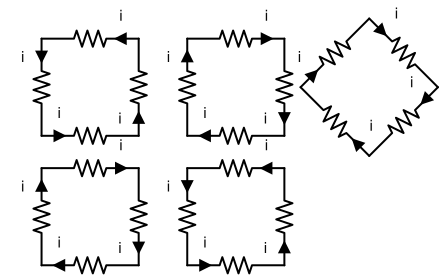

In [33]:
# Inline current arrows
d = schemdraw.Drawing()
R1 = d.add(elm.Resistor, d='left')
d.add(elm.CurrentLabelInline(xy=R1.center, label='$i_{R1}$'))  # Needs same direction as R1
R2 = d.add(elm.Resistor, d='down')
d.add(elm.CurrentLabelInline(xy=R2.center, label='$i_{R2}$'))
R3 = d.add(elm.Resistor, d='right')
d.add(elm.CurrentLabelInline(xy=R3.center, label='$i_{R3}$'))
R4 = d.add(elm.Resistor, d='up')
d.add(elm.CurrentLabelInline(xy=R4.center, label='$i_{R4}$'))


R5 = d.add(elm.Resistor, d='left', xy=[0, -4])
d.add(elm.CurrentLabelInline(xy=R5.center, label='$i_{R5}$', direction='out'))
R6 = d.add(elm.Resistor, d='down')
d.add(elm.CurrentLabelInline(xy=R6.center, label='$i_{R6}$', direction='out'))
R7 = d.add(elm.Resistor, d='right')
d.add(elm.CurrentLabelInline(xy=R7.center, label='$i_{R7}$', direction='out'))
R8 = d.add(elm.Resistor, d='up')
d.add(elm.CurrentLabelInline(xy=R8.center, label='$i_{R8}$', direction='out'))

R9 = d.add(elm.Resistor, d='left', xy=[4.5, 0])
d.add(elm.CurrentLabelInline(xy=R9.center, label='$i_{R9}$', direction='out'))
R10 = d.add(elm.Resistor, d='down')
d.add(elm.CurrentLabelInline(xy=R10.center, label='$i_{R10}$', direction='out'))
R11 = d.add(elm.Resistor, d='right')
d.add(elm.CurrentLabelInline(xy=R11.center, label='$i_{R11}$', direction='out'))
R12 = d.add(elm.Resistor, d='up')
d.add(elm.CurrentLabelInline(xy=R12.center, label='$i_{R12}$', direction='out'))

R13 = d.add(elm.Resistor, d='left', xy=[4.5, -4])
d.add(elm.CurrentLabelInline(xy=R13.center, label='$i_{R13}$', direction='in'))
R14 = d.add(elm.Resistor, d='down')
d.add(elm.CurrentLabelInline(xy=R14.center, label='$i_{R14}$', direction='in'))
R15 = d.add(elm.Resistor, d='right')
d.add(elm.CurrentLabelInline(xy=R15.center, label='$i_{R15}$', direction='in'))
R16 = d.add(elm.Resistor, d='up')
d.add(elm.CurrentLabelInline(xy=R16.center, label='$i_{R16}$', direction='in'))

R17 = d.add(elm.Resistor, theta=45, xy=[5, -1.5])
d.add(elm.CurrentLabelInline(xy=R17.center, label='$i_{R17}$', direction='in'))
R18 = d.add(elm.Resistor, theta=-45)
d.add(elm.CurrentLabelInline(xy=R18.center, label='$i_{R18}$', direction='in'))
R19 = d.add(elm.Resistor, theta=-135)
d.add(elm.CurrentLabelInline(xy=R19.center, label='$i_{R19}$', direction='in'))
R20 = d.add(elm.Resistor, theta=-225)
d.add(elm.CurrentLabelInline(xy=R20.center, label='$i_{R20}$', direction='in'))
d.draw()


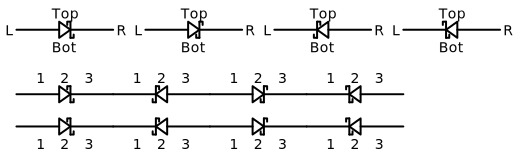

In [34]:
# Check that labels are drawn on the correct side
# with correct alignment
d = schemdraw.Drawing()
d.add(elm.Schottky, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, xy=[4,0], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, xy=[8,0], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, xy=[12,0], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.here = [0, -2]
d.add(elm.Schottky, label=['1', '2', '3'])
d.add(elm.Schottky, reverse='True', label=['1', '2', '3'])
d.add(elm.Schottky, flip=True, label=['1', '2', '3'])
d.add(elm.Schottky, flip=True, reverse='True', label=['1', '2', '3'])
d.here = [0, -3]
d.add(elm.Schottky, botlabel=['1', '2', '3'])
d.add(elm.Schottky, reverse='True', botlabel=['1', '2', '3'])
d.add(elm.Schottky, flip=True, botlabel=['1', '2', '3'])
d.add(elm.Schottky, flip=True, reverse='True', botlabel=['1', '2', '3'])
d.draw()

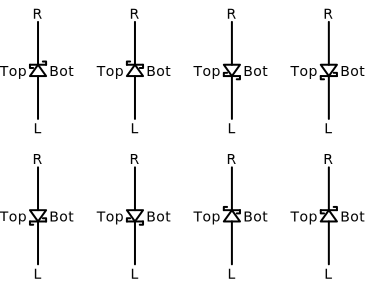

In [35]:
d = schemdraw.Drawing()
d.add(elm.Schottky, d='up', label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, d='up', xy=[3,0], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, d='up', xy=[6,0], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, d='up', xy=[9,0], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')

d.add(elm.Schottky, d='down', xy=[0,-1.5], label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, d='down', xy=[3,-1.5], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, d='down', xy=[6,-1.5], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, d='down', xy=[9,-1.5], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')

d.draw()

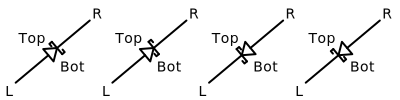

In [36]:
d = schemdraw.Drawing()
d.add(elm.Schottky, theta=40, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, theta=40, xy=[3,0], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, theta=40, xy=[6,0], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(elm.Schottky, theta=40, xy=[9,0], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.draw()

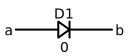

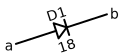

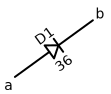

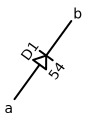

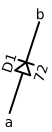

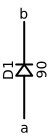

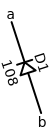

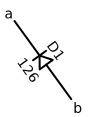

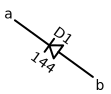

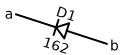

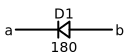

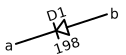

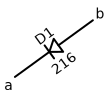

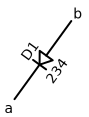

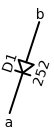

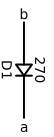

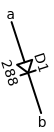

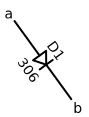

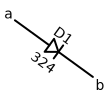

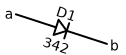

In [37]:
# Label text rotated with the element - text should never go "upside down"
div = 20
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(elm.Diode, theta=th, label='D1', lblrotate=True)
    R1.add_label('%.0f'%th, loc='bot', rotation=th)
    R1.add_label('a', loc='lft')
    R1.add_label('b', loc='rgt')
    display(d.draw())
    

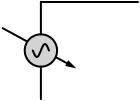

In [38]:
# Zorder. Arrow goes behind.
class TestZorder(elm.SourceSin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.segments.append(schemdraw.SegmentArrow([1.2, 1.2], [0, -1],
                                          headwidth=.12, headlength=.2, zorder=0))

d = schemdraw.Drawing()
d.add(TestZorder, fill='lightgray')
d.add(elm.LINE, d='right')
d.draw()

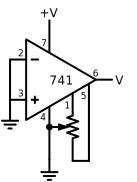

In [39]:
d = schemdraw.Drawing(fontsize=12)
op = d.add(elm.Opamp, label='741', lblloc='center', lblofst=0)
d.add(elm.Line, xy=op.in1, d='left', l=.5)
d.add(elm.Line, d='down', l=d.unit/2)
d.add(elm.Ground)
d.add(elm.Line, xy=op.in2, d='left', l=.5)
d.add(elm.Line, xy=op.out, d='right', l=.5, rgtlabel='$V_o$')
d.add(elm.Line, xy=op.vd, d='up', l=1, rgtlabel='$+V_s$')
trim = d.add(elm.Potentiometer, xy=op.n1, d='down', flip=True, zoom=.7)
d.add(elm.Line, d='right', tox=op.n1a)
d.add(elm.Line, d='up', to=op.n1a)
d.add(elm.Line, d='left', xy=trim.tap, tox=op.vs)
d.add(elm.Dot)
d.push()
d.add(elm.Line, d='down', l=d.unit/3)
d.add(elm.Ground)
d.pop()
d.add(elm.Line, d='up', toy=op.vs)    
op.add_label('1', loc='n1', size=9, ofst=[-.1, -.25], align=('right', 'top'))
op.add_label('5', loc='n1a', size=9, ofst=[-.1, -.25], align=('right', 'top'))
op.add_label('4', loc='vs', size=9, ofst=[-.1, -.2], align=('right', 'top'))
op.add_label('7', loc='vd', size=9, ofst=[-.1, .2], align=('right', 'bottom'))
op.add_label('2', loc='in1', size=9, ofst=[-.1, .1], align=('right', 'bottom'))
op.add_label('3', loc='in2', size=9, ofst=[-.1, .1], align=('right', 'bottom'))
op.add_label('6', loc='out', size=9, ofst=[-.1, .1], align=('left', 'bottom'))
d.draw()

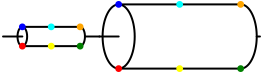

In [40]:
d = schemdraw.Drawing()
C = d.add(elm.Coax)  # Default coax
d.add(elm.Dot, xy=C.shieldstart, color='red')
d.add(elm.Dot, xy=C.shieldend, color='green')
d.add(elm.Dot, xy=C.shieldstart_top, color='blue')
d.add(elm.Dot, xy=C.shieldend_top, color='orange')
d.add(elm.Dot, xy=C.shieldcenter, color='yellow')
d.add(elm.Dot, xy=C.shieldcenter_top, color='cyan')

C2 = d.add(elm.Coax(length=5, radius=1, xy=C.end))  # Custom coax
d.add(elm.Dot, xy=C2.shieldstart, color='red')
d.add(elm.Dot, xy=C2.shieldend, color='green')
d.add(elm.Dot, xy=C2.shieldstart_top, color='blue')
d.add(elm.Dot, xy=C2.shieldend_top, color='orange')
d.add(elm.Dot, xy=C2.shieldcenter, color='yellow')
d.add(elm.Dot, xy=C2.shieldcenter_top, color='cyan')

d.draw()

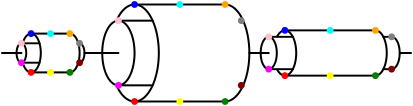

In [41]:
d = schemdraw.Drawing()
T = d.add(elm.Triax)  # Default triax
d.add(elm.Dot, xy=T.shieldstart, color='red')
d.add(elm.Dot, xy=T.shieldend, color='green')
d.add(elm.Dot, xy=T.shieldstart_top, color='blue')
d.add(elm.Dot, xy=T.shieldend_top, color='orange')
d.add(elm.Dot, xy=T.shieldcenter, color='yellow')
d.add(elm.Dot, xy=T.shieldcenter_top, color='cyan')
d.add(elm.Dot, xy=T.guardstart, color='magenta')
d.add(elm.Dot, xy=T.guardend, color='maroon')
d.add(elm.Dot, xy=T.guardstart_top, color='pink')
d.add(elm.Dot, xy=T.guardend_top, color='gray')

# Custom triax - end is covered up
T2 = d.add(elm.Triax(length=5, radiusinner=1, radiusouter=1.5, 
                   shieldofststart=.5, shieldofstend=.5, xy=T.end))
d.add(elm.Dot, xy=T2.shieldstart, color='red')
d.add(elm.Dot, xy=T2.shieldend, color='green')
d.add(elm.Dot, xy=T2.shieldstart_top, color='blue')
d.add(elm.Dot, xy=T2.shieldend_top, color='orange')
d.add(elm.Dot, xy=T2.shieldcenter, color='yellow')
d.add(elm.Dot, xy=T2.shieldcenter_top, color='cyan')
d.add(elm.Dot, xy=T2.guardstart, color='magenta')
d.add(elm.Dot, xy=T2.guardend, color='maroon')
d.add(elm.Dot, xy=T2.guardstart_top, color='pink')
d.add(elm.Dot, xy=T2.guardend_top, color='gray')

# Custom triax - end is shown
T3 = d.add(elm.Triax(length=5, radiusinner=.5, radiusouter=.7, 
                     shieldofststart=.5, shieldofstend=.5, xy=T2.end))
d.add(elm.Dot, xy=T3.shieldstart, color='red')
d.add(elm.Dot, xy=T3.shieldend, color='green')
d.add(elm.Dot, xy=T3.shieldstart_top, color='blue')
d.add(elm.Dot, xy=T3.shieldend_top, color='orange')
d.add(elm.Dot, xy=T3.shieldcenter, color='yellow')
d.add(elm.Dot, xy=T3.shieldcenter_top, color='cyan')
d.add(elm.Dot, xy=T3.guardstart, color='magenta')
d.add(elm.Dot, xy=T3.guardend, color='maroon')
d.add(elm.Dot, xy=T3.guardstart_top, color='pink')
d.add(elm.Dot, xy=T3.guardend_top, color='gray')

d.draw()

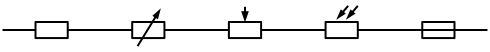

In [42]:
elm.style(elm.STYLE_IEC)
d = schemdraw.Drawing()
d += elm.Resistor()
d += elm.ResistorVar()
d += elm.Potentiometer()
d += elm.Photoresistor()
d += elm.Fuse()
d.draw()

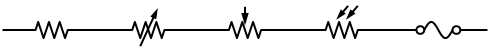

In [43]:
elm.style(elm.STYLE_US)
d = schemdraw.Drawing()
d += elm.Resistor()
d += elm.ResistorVar()
d += elm.Potentiometer()
d += elm.Photoresistor()
d += elm.Fuse()
d.draw()

In [44]:
from functools import partial
elm.style({'Diode': partial(elm.Diode, fill='red')})
elm.Diode()

In [45]:
schemdraw.theme('monokai')
d = schemdraw.Drawing()
d += elm.Resistor()
d.draw()